1.IMPORTING DATA AND PACKAGES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('HR_comma_sep.csv')

In [5]:
df.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


2.DATA CHECKS TO PERFORM

In [6]:
#check missing values
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

No missing values are present

In [8]:
#check duplicates
df.duplicated().sum()

np.int64(3008)

In [9]:
df[df.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [10]:
df.drop_duplicates(keep='first',inplace=True)

In [11]:
df.shape

(11991, 10)

In [12]:
df.duplicated().sum()

np.int64(0)

All the duplicated rows has been removed

In [13]:
#checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   sales                  11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


There are 2 columns with datatype float64, 6 columns with int64 and 2 columns with datatype object.

In [14]:
#checking statistics of dataset
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [15]:
#checking number of unique values of each column
df.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
sales                     10
salary                     3
dtype: int64

In [16]:
#renaming the column name 'sales' as 'department'
df.rename(columns = {'sales':'department'}, inplace = True)

In [18]:
#checking various categories present in the columns department and salary
print('categories in department column:',df['department'].unique())
print('categories in salary column',df['salary'].unique())

categories in department column: ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
categories in salary column ['low' 'medium' 'high']


In [19]:
#applying one hot encoding
df= pd.get_dummies(data = df, columns = ['department'], drop_first = True)

In [20]:
#applying label encoding
df['salary'] = df['salary'].map({'low':0, 'medium': 1, 'high': 2})

In [21]:
df['salary'].value_counts()

salary
0    5740
1    5261
2     990
Name: count, dtype: int64

EXPLORATORY DATA ANALYSIS

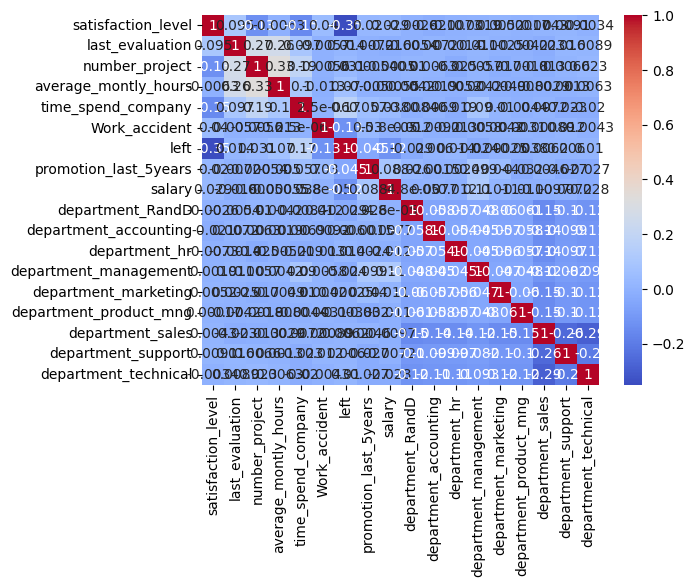

In [ ]:
#using Heatmap
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

Heatmap shows 'last_evaluation','number_project' and 'average_monthly_hours' are highly correlated.

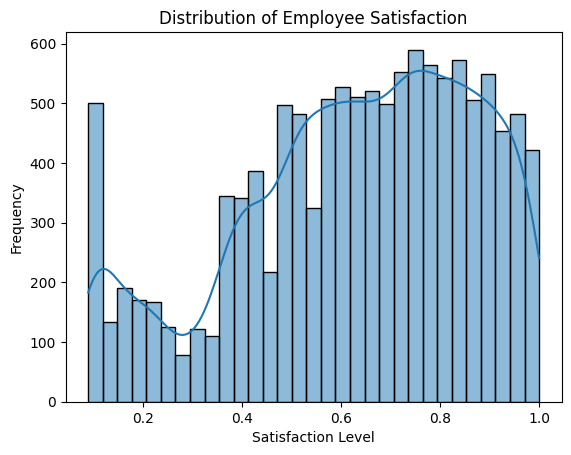

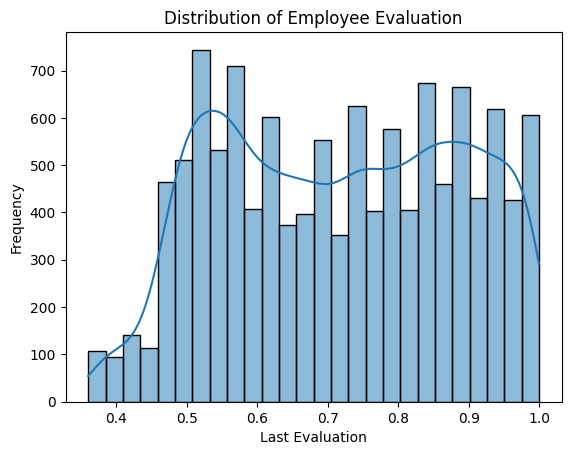

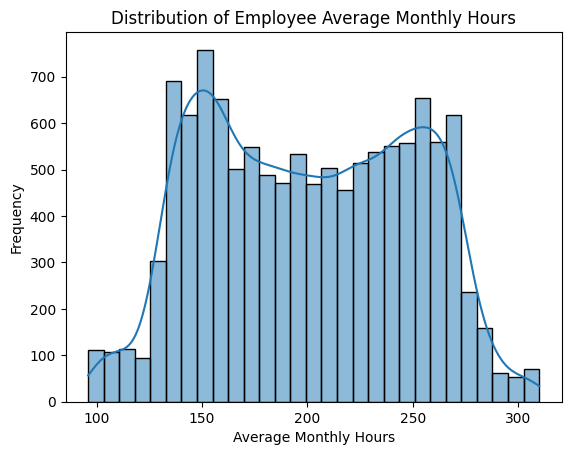

In [ ]:
#Using histogram and line graph
# Distribution of Employee Satisfaction
sns.histplot(df['satisfaction_level'], kde=True)
plt.title("Distribution of Employee Satisfaction")
plt.xlabel("Satisfaction Level")
plt.ylabel("Frequency")
plt.show()

# Distribution of Employee Evaluation
sns.histplot(df['last_evaluation'], kde=True)
plt.title("Distribution of Employee Evaluation")
plt.xlabel("Last Evaluation")
plt.ylabel("Frequency")
plt.show()

# Distribution of Employee Average Monthly Hours
sns.histplot(df['average_montly_hours'], kde=True)
plt.title("Distribution of Employee Average Monthly Hours")
plt.xlabel("Average Monthly Hours")
plt.ylabel("Frequency")
plt.show()

Insights:

Graph 1
-Most prominent peak occurs b/w 0.7 and 0.9 indicates large portion of employees reporting high satisfaction, yet multiple peaks show distinct subgroups.

Graph 2
-Peak around 0.55 indicates moderate performance scores.

-2nd peak near 0.85 -0.95 indicates top-performing employees.

Graph 3
-Two clear peaks at 150hrs and 250hrs indicates two dominant working hour patterns among employees.

-Range of hours from 150 to 250 show wide spread of workload intensity.

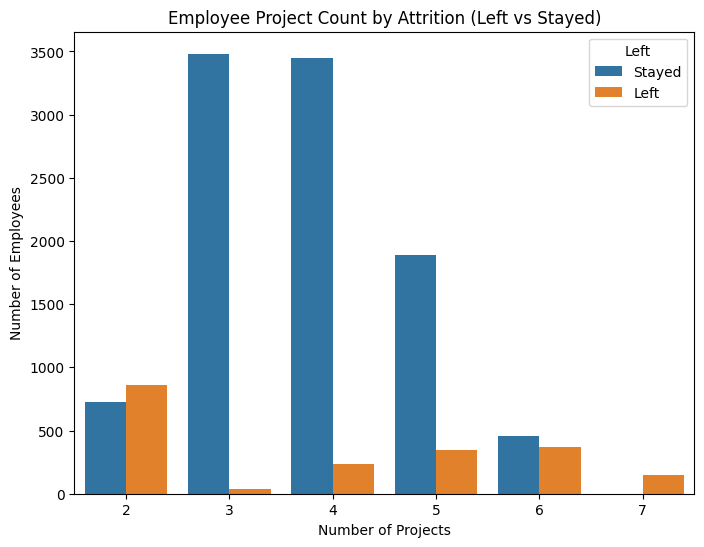

In [25]:
#using bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x="number_project", hue="left", data=df)
plt.title("Employee Project Count by Attrition (Left vs Stayed)")
plt.xlabel("Number of Projects")
plt.ylabel("Number of Employees")
plt.legend(title="Left", labels=["Stayed", "Left"])
plt.show()

Insights:

-Most employees worked on 3 projects

-Low project count show high proportion of attrition

-Higher workload doesn't necessarily lead to higher attrition.